| **Name**         | Tufan Kundu               |
|------------------|---------------------------|
| **Reg No.**      | 24MDT0184                 |
| **Course Name**  | Regression Analysis and Predictive Models Lab    |
| **Course Code**  | PMDS504P                  |
| **Set**   | B  |
| **Assessment**   | Digital Assessment 4  |


# QUESTION 1: Data Understanding & Visualization

## AIM: To understand the behavior of monthly sunspot activity data and visualize it. Perform exploratory data analysis and required pre processing steps on the data.

### Loading the necessary libraries

In [90]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

## Data Preprocessing

### Loading the dataset

In [91]:
df = pd.read_csv("Sunspot.csv")
df.head() # displaying the first few rows of the dataset

,Month,Sunspots
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2820 entries, 0 to 2819
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Month     2820 non-null   object 
 1   Sunspots  2820 non-null   float64
dtypes: float64(1), object(1)
memory usage: 44.2+ KB


### Renaming month column as Time-Stamp

In [93]:
df.rename(columns={'Month': 'Time-Stamp'}, inplace=True)

In [94]:
df.head()

,Time-Stamp,Sunspots
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0


### Converting the Month column to datetime and setting as index.

In [95]:
df['Time-Stamp'] = pd.to_datetime(df['Time-Stamp'])
df.set_index('Time-Stamp', inplace = True)

In [96]:
df.head()

,Sunspots
Time-Stamp,
1749-01-01,58.0
1749-02-01,62.6
1749-03-01,70.0
1749-04-01,55.7
1749-05-01,85.0


### Handling missing values

In [97]:
df.isnull().sum()

Sunspots    0
dtype: int64

- the dataset has no missing values

## Exploratory Data Analysis

### Display summary statistics (count, mean, std, min, max, etc.).

In [98]:
## Summary Statistics
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
           Sunspots
count  2820.000000
mean     51.265957
std      43.448971
min       0.000000
25%      15.700000
50%      42.000000
75%      74.925000
max     253.800000


### Plot a line chart showing sunspot activity over time.

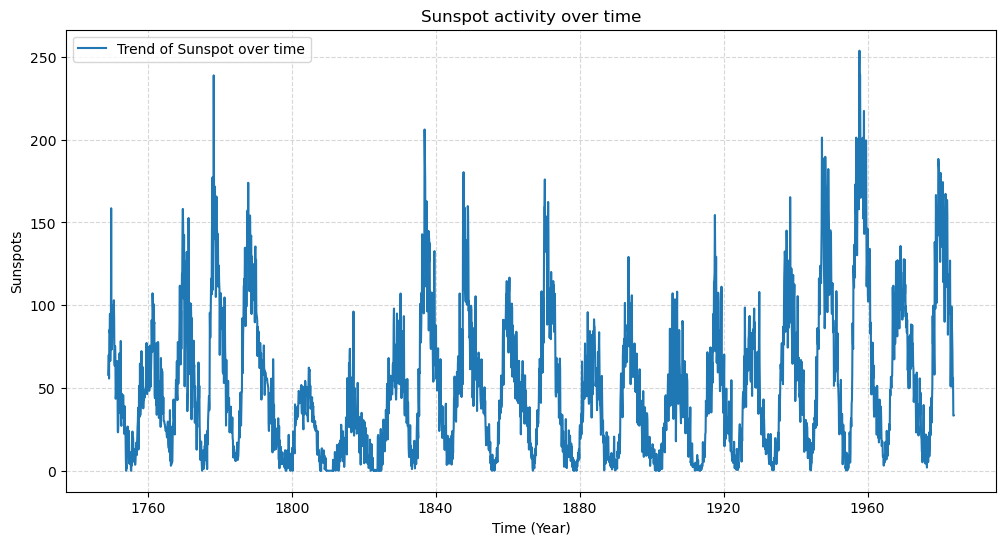

In [99]:
plt.figure(figsize = (12,6))
plt.plot(df.index,df['Sunspots'],label='Trend of Sunspot over time')
plt.title("Sunspot activity over time")
plt.xlabel("Time (Year)")
plt.ylabel("Sunspots")
plt.grid(True, linestyle='--', alpha = 0.5)
plt.legend()
plt.show()

- The plot shows sunspot activity trends across time.
- There is a regular cyclic pattern, but the intensity of peaks varies across cycles, indicating periodic but varying sunspot activity

| **Name**         | Tufan Kundu               |
|------------------|---------------------------|
| **Reg No.**      | 24MDT0184                 |
| **Course Name**  | Regression Analysis and Predictive Models Lab    |
| **Course Code**  | PMDS504P                  |
| **Set**   | B  |
| **Assessment**   | Digital Assessment 5  |


# QUESTION 2: Stationarity Check & Autocorrelation Analysis

## AIM: To check Stationarity and perform Autocorrelation Analysis on the monthly sunspot activity dataset.

## Stationarity Check

### Apply the Augmented Dickey-Fuller (ADF) test

In [100]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

In [101]:
# Applying (ADF) Test
adf_result = adfuller(df['Sunspots'])

# Printing the  results
print("\n--- ADF Test Results ---")
print(f"ADF Statistic        : {adf_result[0]:.4f}")
print(f"p-value              : {adf_result[1]:.4f}")
print(f"Number of lags used  : {adf_result[2]}")
print(f"Number of observations used: {adf_result[3]}")
print("Critical Values      :")
for key, value in adf_result[4].items():
    print(f"   {key}: {value:.4f}")

# Interpretation
if adf_result[1] < 0.05:
    print("\nConclusion: The series is stationary, so we reject the null hypothesis.")
else:
    print("\nConclusion: The series is not stationary, so we fail to reject the null hypothesis.")


--- ADF Test Results ---
ADF Statistic        : -9.5677
p-value              : 0.0000
Number of lags used  : 27
Number of observations used: 2792
Critical Values      :
   1%: -3.4327
   5%: -2.8626
   10%: -2.5673

Conclusion: The series is stationary, so we reject the null hypothesis.


##  b) Autocorrelation Analysis 

<Figure size 1000x400 with 0 Axes>

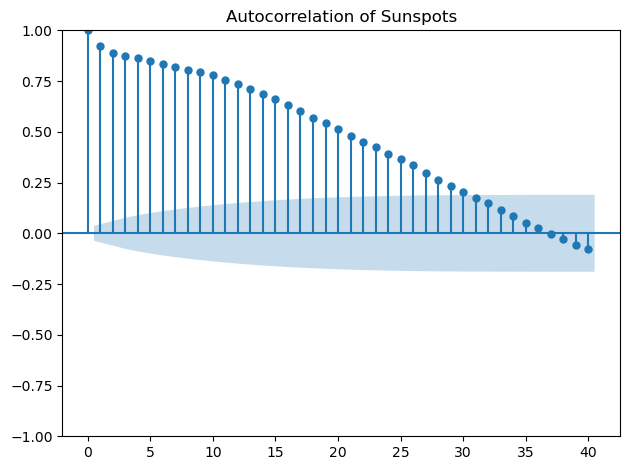

In [103]:
### Plotting the autocorrelation function

plt.figure(figsize=(10, 4))
plot_acf(df['Sunspots'], lags=40)
plt.title('Autocorrelation of Sunspots')
plt.tight_layout()
plt.show()

## Interpretation 
- The first lag has a high autocorrelation, which is expected as a time series is always correlated with itself at lag 0.
- The autocorrelation slowly decreases and remains significantly positive for many lags.
- The autocorrelation slowly decreases and remains significantly positive for many lags
